<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('/datasets/insurance.csv')
data.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


Видим, что пропусков в данных нет.

Изменим тип данных столбца "Возраст" на целочисленный. 

In [4]:
data['Возраст'] = data['Возраст'].astype('int64')

Посмотрим на распределение по различным признакам. 

<AxesSubplot:>

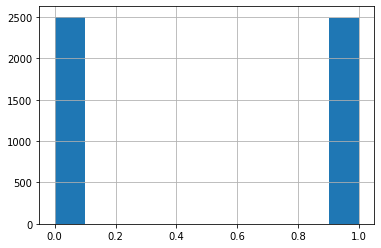

In [5]:
data['Пол'].hist()

По полу клиенты распределены равномерно.

In [6]:
data['Возраст'].describe()

count    5000.000000
mean       30.952800
std         8.440807
min        18.000000
25%        24.000000
50%        30.000000
75%        37.000000
max        65.000000
Name: Возраст, dtype: float64

Все клиенты старше 18 лет. Средний возраст клиентов около 31 года. 

In [7]:
data['Зарплата'].describe()

count     5000.000000
mean     39916.360000
std       9900.083569
min       5300.000000
25%      33300.000000
50%      40200.000000
75%      46600.000000
max      79000.000000
Name: Зарплата, dtype: float64

In [8]:
data['Члены семьи'].describe()

count    5000.000000
mean        1.194200
std         1.091387
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         6.000000
Name: Члены семьи, dtype: float64

In [9]:
data['Страховые выплаты'].describe()

count    5000.000000
mean        0.148000
std         0.463183
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         5.000000
Name: Страховые выплаты, dtype: float64

<AxesSubplot:>

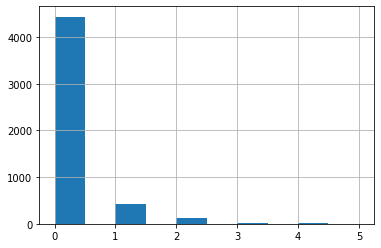

In [10]:
data['Страховые выплаты'].hist()

In [11]:
data[data['Страховые выплаты'] > 0].count()

Пол                  564
Возраст              564
Зарплата             564
Члены семьи          564
Страховые выплаты    564
dtype: int64

В среднем клиенты имеют зарплату около 40000 и одного члена семьи. 
11% клиентов получали хотя бы одну страховую выплату за последние 5 лет. Всего 26 человек получали больше двух страховых выплат за 5 лет.

In [12]:
print('Количество дубликатов:', data.duplicated().sum())

Количество дубликатов: 153


В данных есть подозрение на дубликаты, но мы не будет их удалять. Могло так случиться, что пользователи действительно имеют одинаковый пол, зарплату, количество членов семьи и страховых выплат. В предоставленных данных отсутствют уникальные идентификаторы пользователей, по которым можно было бы подтвердить или опровергнуть наличие дубликатов. 

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

В данном разделе необходимо решить задачу: Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии?

a. Изменится. Приведите примеры матриц.

b. Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.

**Ответ:** Качество линейной регрессии не изменится.

**Обоснование:** 
Умножим матрицу признаков на обратимую матрицу $Z$. Матрица признаков изменилась, значит могли измениться и вектор весов линейной регрессии, и вектор предсказаний. Обозначим их за $w_{new}$ и $a_{new}$,  соответственно:

$$
a_{new} = XZw_{new}
$$

Подставим измененную матрицу признаков $(XZ)$ в формулу обучения:

$$
w_{new} = ((XZ)^T XZ)^{-1} (XZ)^T y
$$

Далее используем свойсва матриц и выполним преобразования.
$$
(AB)^T = B^T A^T
$$
$$
(AB)^{-1} = B^{-1} A^{-1} $$
$$
AA^{-1} = A^{-1}A = E
$$


Подставляем $w_{new}$ в $a_{new}$:

$$
a_{new} = XZ((XZ)^T XZ)^{-1} (XZ)^T y
$$

Раскрываем скобки:

$$
a_{new} = XZ (Z^{T} X^{T} XZ)^{-1} Z^T X^T y
$$

$$
a_{new} = XZ Z^{-1} (X^T X)^{-1} (Z^T)^{-1} Z^T X^T y
$$


По условию задачи сказано, что $Z$ - это обратимая матрица.
Упростим выражение, используя:

$$
Z Z^{-1} = E
$$

Если матрица обратима, то и её транспонированная обратима, воспользуемся свойством:

$$
(Z^T)^{-1} Z^T = E
$$

Далее сразу опустим умножение на единичные матрицы в преобразовании:

$$
a_{new} = X (X^T X)^{-1} X^T y
$$

Сравниваем $a_{new}$ с формулой обучения:

$$
w = (X^T X)^{-1} X^T y
$$

Получаем, что

$$
a_{new} = X w = a
$$

Удалось доказать, что формула для расчета предсказаний в линейной регрессии не изменится, если признаки умножат на обратимую матрицу. Следовательно, и качество линейной регрессии не поменяется.

## Алгоритм преобразования

**Алгоритм**

Для защиты персональных данных клиентов можно воспользоваться умножением всех признаков на любую квадратную, обратимую матрицу. Для умножения матриц необходимо выполнить условие: количество столбцов первой матрицы должно совпадать с количеством строк второй. 

Мы будем умножать матрицу $X$, у которой 4 столбца, значит у матрицы для преобразования данных должно быть 4 строки. Также матрица преобразования должна быть обратимой, а следовательно, квадратной. Таким образом определяем, что для защиты персональных данных матрицу $X$ будем умножать на случайную обратимую матрицу $Z$ размером 4 на 4.

**Шаги алгоритма:**

1. Методом np.random.rand() сгенерировать случайную матрицу $Z$ размером 4x4. Данная матрица станет ключом кодирования. 


2. Методом np.linalg.inv() проверить сгенерированную матрицу на обратимость. Если случайная матрица $Z$ оказалась необратимой, но вернуться к пункту 1. 


3. Умножить матрицу признаков $X$ на полученную матрицу $Z$, используя метод dot(). После умножения мы получаем закодированную инфомрацию о пользователях, представленную матрицей $XZ$. 


4. Ключ кодирования $Z$ желательно сохранить отдельно от данных пользователей, записанных в матрице $Х$. $Z$ - спрячем, а настоящую матрицу $Х$ можно удалить, чтобы не рассекретить данные.


5. В обучении линейной регрессии использовать зашифрованную матрицу признаков $ХZ$.

**Обоснование**

В пункте 2 было показано, что такое преобразованием данных не изменит качество линейной регрессии. При этом восстановить персональную информацию по преобразованным данным сможет только человек, у которого будет ключ - матрица преобразования.

## Проверка алгоритма

Создадим матрицу признаков $X$ и вектор целевого признака $y$. Напишем функцию, аргументы которой - это матрица признаков и целевой признак, а значение - метрика R2 качества линейной регрессии. 

In [13]:
X = data.drop('Страховые выплаты', axis=1)
y = data['Страховые выплаты']

In [14]:
def r2_score_func(X, y):
    model = LinearRegression()
    model.fit(X, y)
    predictions = model.predict(X)
    return r2_score(y, predictions)

Оценим качество линейной регрессии до преобразования признаков:

In [15]:
r2_score_func(X, y)

0.4249455028666801

Зададим случайную матрицу Z и проверим её обратимость:

In [16]:
Z = np.random.rand(4,4)

np.linalg.inv(Z)

array([[ 0.24202413, -1.81350709,  1.35855344,  1.64942585],
       [-4.00199456,  4.41981409, -1.15961224, -0.7230395 ],
       [ 3.80177489, -4.0234068 ,  2.05903961,  0.49220883],
       [-0.36067042,  1.615306  , -1.21275077, -0.2352263 ]])

Умножим матрицу X на матрицу преобразования Z. Оценим качество линейной регрессии, после преобразования признаков.

In [17]:
XZ = X.dot(Z)
r2_score_func(XZ, y)

0.42494550286665844

Вывод

После преобразования признаков качество предсказания модели не изменилось. Качество проверялось с помощью R2 метрики. Умножение данных на случайную обратимую матрицу может быть использовано для защиты персональных данных клиентов страховой компании "Хоть потоп".